<a href="https://colab.research.google.com/github/mostafadentist/python-ipynb/blob/main/Simulation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated π = 3.1636


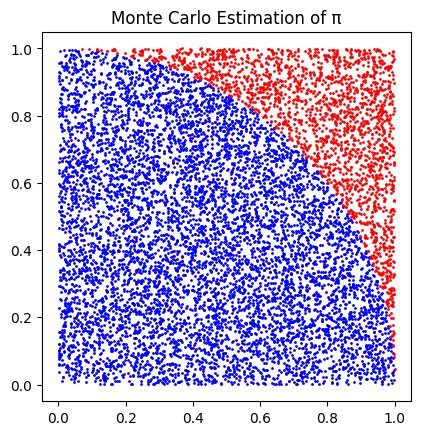

In [43]:
import random
import matplotlib.pyplot as plt

N = 10000
inside = 0
x_in, y_in = [], []
x_out, y_out = [], []

for _ in range(N):
    x, y = random.random(), random.random()
    if x**2 + y**2 <= 1:
        inside += 1
        x_in.append(x); y_in.append(y)
    else:
        x_out.append(x); y_out.append(y)

pi_est = 4 * inside / N
print("Estimated π =", pi_est)

plt.scatter(x_in, y_in, color='blue', s=1)
plt.scatter(x_out, y_out, color='red', s=1)
plt.gca().set_aspect('equal')
plt.title("Monte Carlo Estimation of π")
plt.show()

In [44]:
import numpy as np

# Exponential distribution (mean=5)
samples = np.random.exponential(scale=5, size=10)
print("Exponential samples:", samples)

# Poisson arrivals (λ=3)
samples = np.random.poisson(lam=3, size=10)
print("Poisson samples:", samples)

Exponential samples: [ 2.04090272  1.16883457  0.95162233 11.56862224 13.25492888  0.18520144
  4.97020919  2.89397363 12.74824589 24.70263867]
Poisson samples: [4 4 1 3 2 3 4 2 4 3]


Total Orders Placed: 20


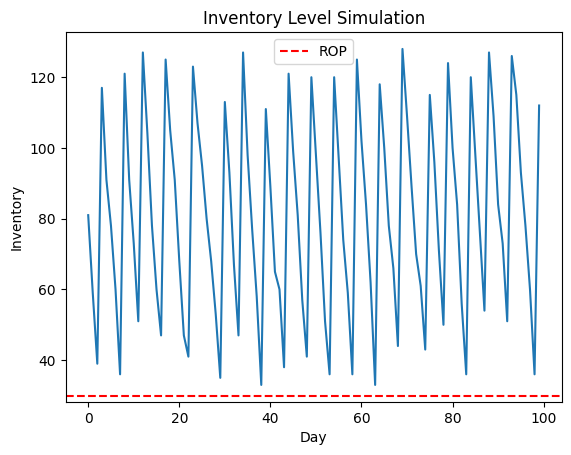

In [45]:
def simulate_inventory(Q, ROP, demand_mean, sigma, days=50):
    inventory = Q
    orders = 0
    history = []

    for day in range(days):
        demand = int(np.random.normal(demand_mean, sigma))
        demand = max(0, demand)
        inventory -= demand

        if inventory <= ROP:  # reorder
            orders += 1
            inventory += Q

        history.append(inventory)

    return history, orders

history, orders = simulate_inventory(Q=100, ROP=30, demand_mean=20, sigma=5, days=100)
print("Total Orders Placed:", orders)

plt.plot(history)
plt.axhline(30, color='r', linestyle='--', label="ROP")
plt.title("Inventory Level Simulation")
plt.xlabel("Day")
plt.ylabel("Inventory")
plt.legend()
plt.show()

In [46]:
def simulate_mm1(lmbda, mu, n_customers=1000):
    arrival = 0
    service_end = 0
    wait_times = []

    for _ in range(n_customers):
        interarrival = np.random.exponential(1/lmbda)
        service = np.random.exponential(1/mu)
        arrival += interarrival
        start = max(arrival, service_end)
        service_end = start + service
        wait_times.append(start - arrival)

    return np.mean(wait_times)

avg_wait = simulate_mm1(lmbda=2, mu=3, n_customers=5000)
print("Simulated average wait time:", round(avg_wait,3))

Simulated average wait time: 0.779


Expected project cost: 110019.76014476271


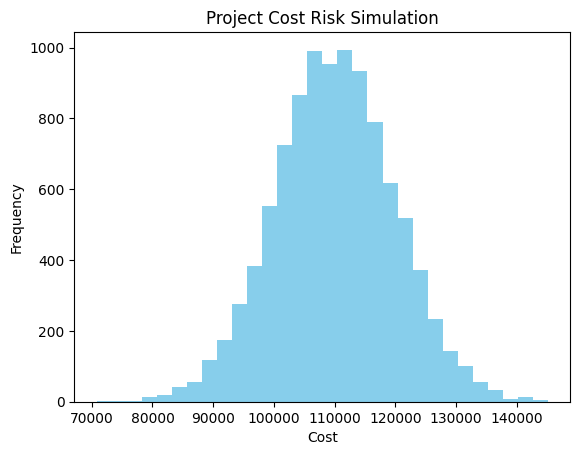

In [47]:
# Project cost simulation
base_cost = 100000
risk_factor = np.random.normal(1.1, 0.1, 10000)  # mean 10% overrun
sim_costs = base_cost * risk_factor

print("Expected project cost:", np.mean(sim_costs))
plt.hist(sim_costs, bins=30, color='skyblue')
plt.title("Project Cost Risk Simulation")
plt.xlabel("Cost")
plt.ylabel("Frequency")
plt.show()